In [2]:
# !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 93.7 MB/s eta 0:00:00
   ━━━━

In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
df = pd.read_csv('/content/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


### Train and Evaluate Model

In [4]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [5]:
experiment = setup(df, target='target', categorical_features=cat_features, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 22)"
5,Transformed train set shape,"(212, 22)"
6,Transformed test set shape,"(91, 22)"
7,Numeric features,7
8,Categorical features,6
9,Preprocess,True


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8346,0.9070,0.9015,0.8140,0.8507,0.6620,0.6783,0.1660
et,Extra Trees Classifier,0.8344,0.8945,0.8508,0.8533,0.8455,0.6658,0.6754,0.2680
ridge,Ridge Classifier,0.8299,0.9141,0.9106,0.8042,0.8486,0.6510,0.6725,0.1120
lr,Logistic Regression,0.8249,0.9126,0.8833,0.8121,0.8409,0.6428,0.6580,0.9110
nb,Naive Bayes,0.8067,0.8713,0.8318,0.8201,0.8166,0.6093,0.6243,0.0980
rf,Random Forest Classifier,0.7924,0.8998,0.8250,0.8113,0.8092,0.5790,0.5943,0.2730
xgboost,Extreme Gradient Boosting,0.7877,0.8544,0.7977,0.8260,0.7966,0.5715,0.5920,0.1480
lightgbm,Light Gradient Boosting Machine,0.7874,0.8640,0.8091,0.8183,0.7993,0.5723,0.5898,0.1690
gbc,Gradient Boosting Classifier,0.7831,0.8800,0.8076,0.8000,0.7975,0.5618,0.5723,0.2000
ada,Ada Boost Classifier,0.7732,0.8113,0.8152,0.7882,0.7889,0.5421,0.5623,0.1800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Test Model

In [7]:
predict_model(best_model, df.sample(10))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8000,0.9600,0.8000,0.8000,0.8000,0.6000,0.6000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1,1,0.9878
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0,0,0.9696
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0,0,0.9859
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,0,0.9820
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1,1,0.9848
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0,0.9872
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1,1,0.9618
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0,0.6682
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,1,0.9954
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0,1,0.6547


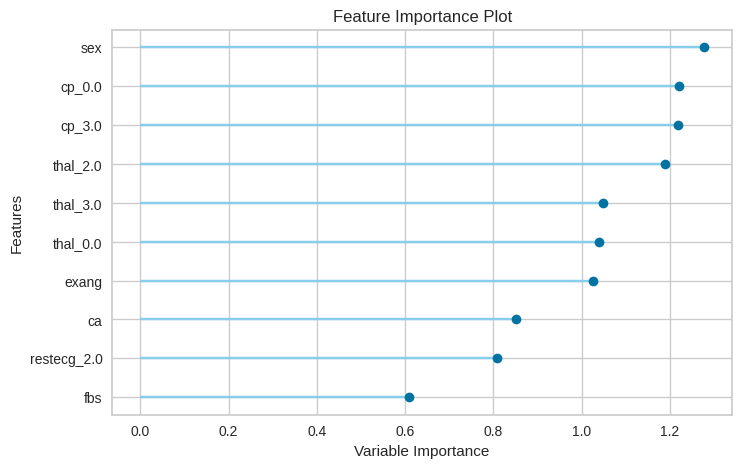

In [8]:
# Plot feature importance
plot_model(best_model, plot="feature")

### Save Model

In [9]:
save_model(best_model, model_name='lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'trestbps', 'chol',
                                              'thalach', 'oldpeak', 'slope',
                                              'ca'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude...
                                     transformer=OneHotEncoder(cols=['cp',
         